In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
full_dataset = pd.read_csv("heart.csv")

full_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Attribute Information (Copied from Kaggle)
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [163]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [166]:
for c in full_categorical_columns.columns:
  print(c,'------>', full_categorical_columns[c].unique())

Sex ------> ['M' 'F']
ChestPainType ------> ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ------> ['Normal' 'ST' 'LVH']
ExerciseAngina ------> ['N' 'Y']
ST_Slope ------> ['Up' 'Flat' 'Down']


In [167]:
for c in full_numeric_columns.columns:
  print(c, '-------> Range(%f - %f)' % (full_numeric_columns[c].min(), full_numeric_columns[c].max()))

Age -------> Range(28.000000 - 77.000000)
RestingBP -------> Range(0.000000 - 200.000000)
Cholesterol -------> Range(0.000000 - 603.000000)
FastingBS -------> Range(0.000000 - 1.000000)
MaxHR -------> Range(60.000000 - 202.000000)
Oldpeak -------> Range(-2.600000 - 6.200000)


Based on the full_dataset.info() output and the unique values of the categorical columns, we can see that there are no missing values or data points with errors. The output matches the description provided for us on kaggle.

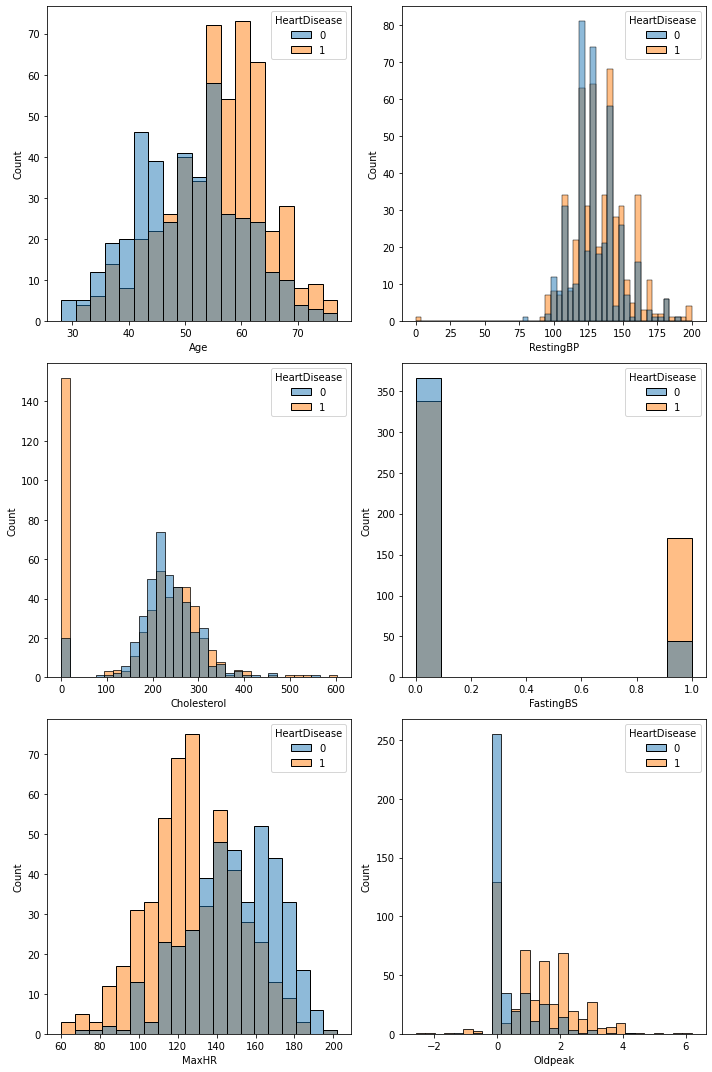

In [173]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

sns.histplot(data = full_dataset, x = 'Age', ax = axs[0,0], hue = "HeartDisease")
sns.histplot(data = full_dataset, x = 'RestingBP', ax = axs[0,1], hue = "HeartDisease")
sns.histplot(data = full_dataset, x = 'Cholesterol', ax = axs[1,0], hue = "HeartDisease")
sns.histplot(data = full_dataset, x = 'FastingBS', ax = axs[1,1], hue = "HeartDisease")
sns.histplot(data = full_dataset, x = 'MaxHR', ax = axs[2,0], hue = "HeartDisease")
sns.histplot(data = full_dataset, x = 'Oldpeak', ax = axs[2,1], hue = "HeartDisease")

plt.tight_layout()

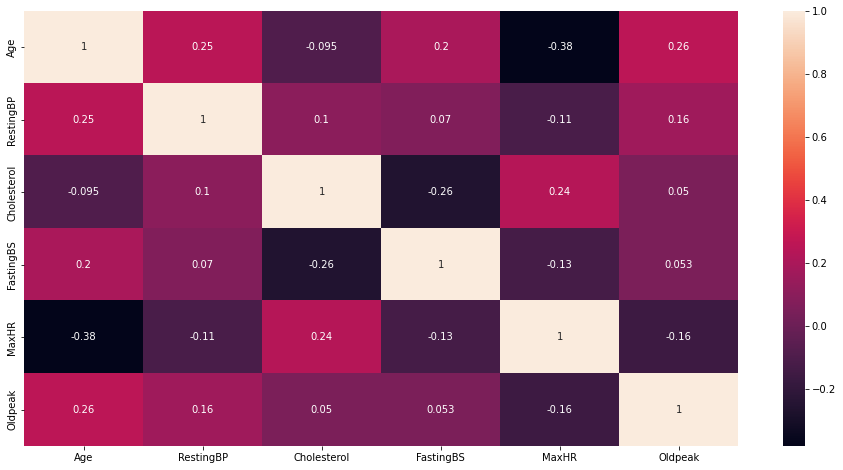

In [168]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(full_dataset.drop("HeartDisease", axis = 1).corr(), annot=True, ax = ax)

Since Naive Bayes classifiers assume that the variables are independent, we have to make sure that there are no strongly correlated features.

In [6]:
full_numeric_columns = full_dataset.select_dtypes(exclude = 'object').drop("HeartDisease", axis = 1)

In [7]:
full_categorical_columns = full_dataset.select_dtypes(include = 'object')

The Gaussian NB implementation assumes that the numerical data follows a normal distribution, so in the next step we will try to visually estimate if the numeric features are normally distributed.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


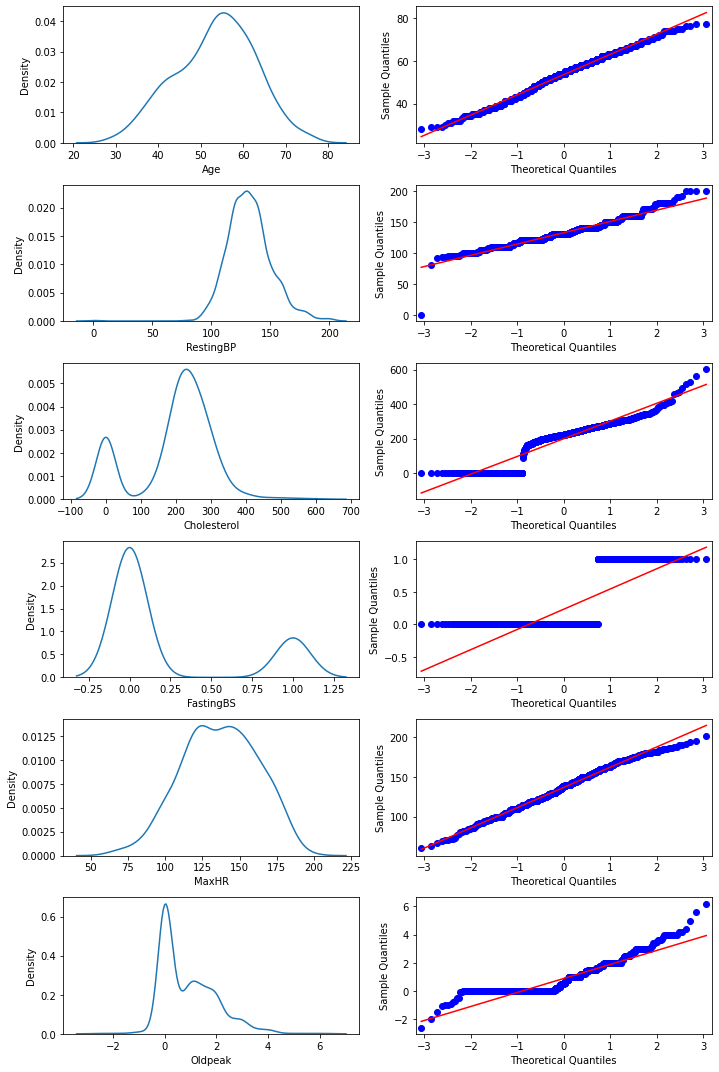

In [8]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

fig, axs = plt.subplots(6, 2, figsize=(10, 15))

qqplot_line = 'r'

sns.kdeplot(data = full_numeric_columns['Age'], ax = axs[0,0])
sm.qqplot(full_numeric_columns['Age'], line= qqplot_line, ax = axs[0,1])
sns.kdeplot(data = full_numeric_columns['RestingBP'], ax = axs[1,0])
sm.qqplot(full_numeric_columns['RestingBP'], line= qqplot_line, ax = axs[1,1])
sns.kdeplot(data = full_numeric_columns['Cholesterol'], ax = axs[2,0])
sm.qqplot(full_numeric_columns['Cholesterol'], line= qqplot_line, ax = axs[2,1])
sns.kdeplot(data = full_numeric_columns['FastingBS'], ax = axs[3,0])
sm.qqplot(full_numeric_columns['FastingBS'], line= qqplot_line, ax = axs[3,1])
sns.kdeplot(data = full_numeric_columns['MaxHR'], ax = axs[4,0])
sm.qqplot(full_numeric_columns['MaxHR'], line= qqplot_line, ax = axs[4,1])
sns.kdeplot(data = full_numeric_columns['Oldpeak'], ax = axs[5,0])
sm.qqplot(full_numeric_columns['Oldpeak'], line= qqplot_line, ax = axs[5,1])

plt.tight_layout()
pylab.show()

The Gaussian NB implementation assumes that the continous numeric features follow a normal distribution, so we will try to transform the numeric features using a StandardScaler.

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

y = full_dataset['HeartDisease']
X = full_dataset.drop(labels = 'HeartDisease', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

NBModel = GaussianNB()

In [56]:
numerical_cols = X_train.select_dtypes(exclude="object").columns
categorical_cols = X_train.select_dtypes(include="object").columns

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Accuracy Score: 0.8434782608695652
Precision Score: 0.8541666666666666
Recall Score: 0.8913043478260869


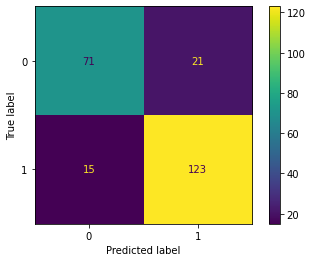

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', NBModel)
                             ])

my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
matrix = confusion_matrix(y_test, preds)

print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=my_pipeline.classes_)

disp.plot()
plt.show()